In [59]:
import cv2
import pywt
import numpy as np
from matplotlib import pyplot as plt
import pywt.data

In [12]:
# 1. Display of Grayscale images

image = cv2.imread('1.jpg')
gray = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# 2. Histogram Equalization Image

# input is gray image
img = gray
equ = cv2.equalizeHist(img)  
# show image input vs output 
cv2.imshow('Original image',img)
cv2.imshow('Histogram Equalization image', equ)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [19]:
# 3. Non-linaer Filtering
# The Median filter is a non-linear filter that is most commonly used as a simple way to reduce noise in an image.
# It's claim to fame (over Gaussian for noise reduction) is that it removes noise while keeping edges relatively 
# sharp.

medianfilter = cv2.medianBlur(image, 3)
cv2.imshow('Original image',image)
cv2.imshow('NonLinear filter - medianBlur image', medianfilter)
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [20]:
# 4. Edge detection using operator 
# Sobel operator edge detection and laplacian method in livestream video

#Capture livestream video content from camera 0 
cap = cv2.VideoCapture(0) 

while(1): 

	# Take each frame 
	_, frame = cap.read() 
	
	# Convert to HSV for simpler calculations 
	hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
	
	# Calcution of Sobelx 
	sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5) 
	
	# Calculation of Sobely 
	sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5) 
	
	# Calculation of Laplacian 
	laplacian = cv2.Laplacian(frame,cv2.CV_64F) 
	
	cv2.imshow('sobelx',sobelx) 
	cv2.imshow('sobely',sobely) 
	cv2.imshow('laplacian',laplacian) 
	k = cv2.waitKey(5) & 0xFF
	if k == 27: 
		break

cv2.destroyAllWindows() 

#release the frame 
cap.release()

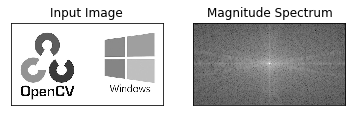

In [24]:
# 5. 2-D DFT and DCT

#  2-D DFT
img = cv2.imread('1.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

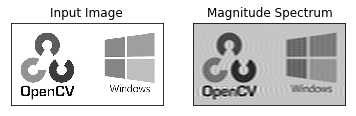

In [26]:
rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [31]:
# 2D DCT 

img = gray      # 1 chan, grayscale!
imf = np.float32(img)/255.0  # float conversion/scale
dst = cv2.dct(imf)           # the dct
img = np.uint8(dst)*255.0    # convert back

cv2.imshow('Original image',image)
cv2.imshow('dst image',dst)
cv2.imshow('img', img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 


In [32]:
# 6. Filtering in frequency Domain

In [34]:
# 7. Display of Color image
image = cv2.imread('1.jpg')

b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

cv2.imshow('Original image',image)

# RGB - Blue
cv2.imshow('B-RGB', b)

# RGB - Green
cv2.imshow('G-RGB', g)

# RGB - Red
cv2.imshow('R-RGB', r)

cv2.waitKey(0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
# 8. Conversion between color spaces

# LAB Color-Space
LABColor = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
YCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)
HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

cv2.imshow('BGR image',image)
cv2.imshow('LAB image',LABColor)
cv2.imshow('YCrCb image', YCrCb)
cv2.imshow('HSV image', HSV)


cv2.waitKey(0) 
cv2.destroyAllWindows()

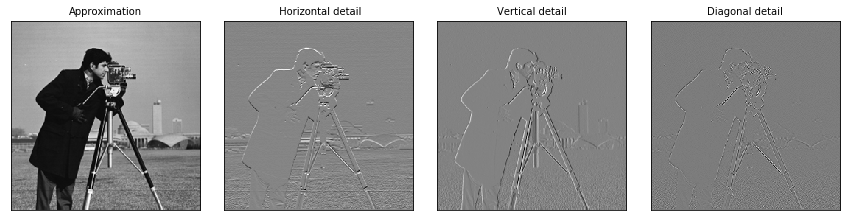

In [42]:
# 9. DWT of images

# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [48]:
# # 10. Watershed tranform
# img = cv2.imread('2.jpg')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# # noise removal
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# # sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# # Finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)

# ret, markers = cv2.connectedComponents(sure_fg)
# markers = markers+1
# markers[unknown==255] = 0
# markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]

# cv2.imshow('Watershed', markers)


# cv2.waitKey(0) 
# cv2.destroyAllWindows()


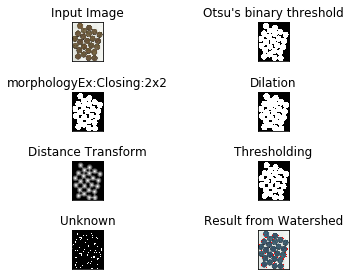

In [60]:
# 10. Watershed tranform
img = cv2.imread('2.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])



# cv2.imshow('HSV image', HSV)
cv2.waitKey(0) 
cv2.destroyAllWindows()

plt.tight_layout()
plt.show()